✅ Data loaded. Shape: (7214, 53)


<ipython-input-9-8e8a3fb48add>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)



📊 Feature: id
count     7214.000000
mean      5501.255753
std       3175.706870
min          1.000000
25%       2735.250000
50%       5509.500000
75%       8246.500000
max      11001.000000
Name: id, dtype: float64


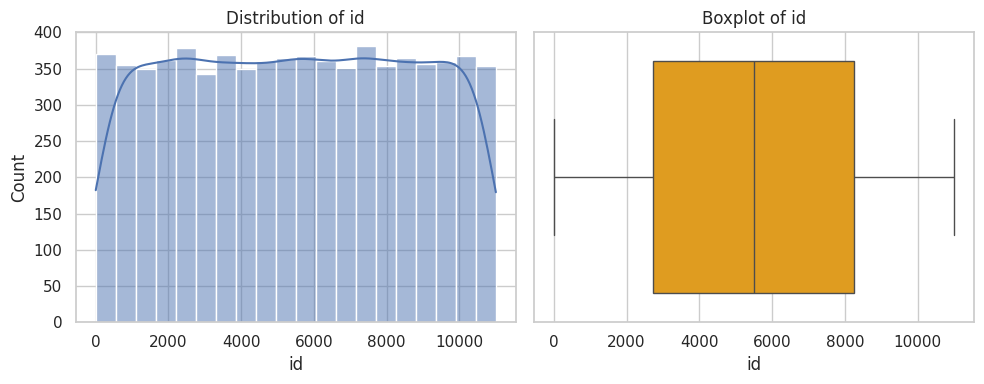

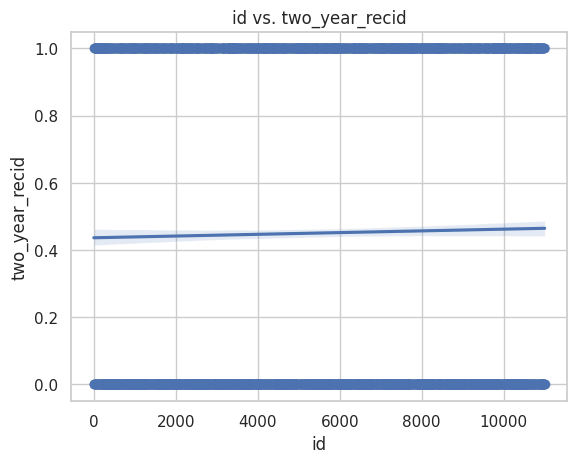


📊 Feature: age
count    7214.000000
mean       34.817993
std        11.888922
min        18.000000
25%        25.000000
50%        31.000000
75%        42.000000
max        96.000000
Name: age, dtype: float64


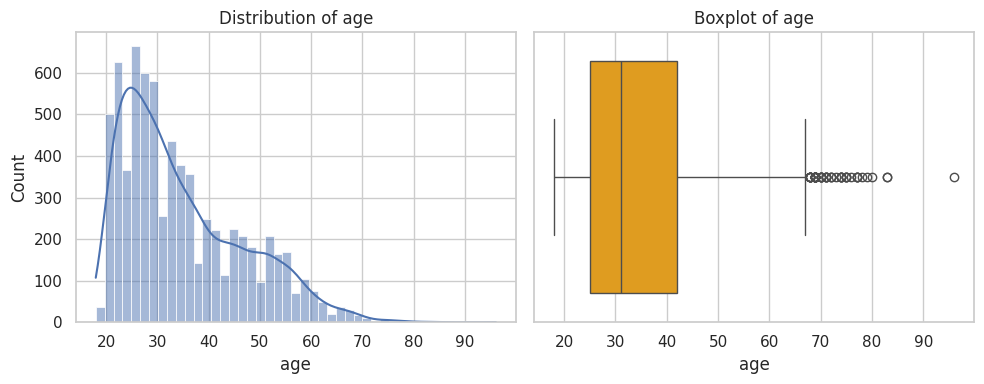

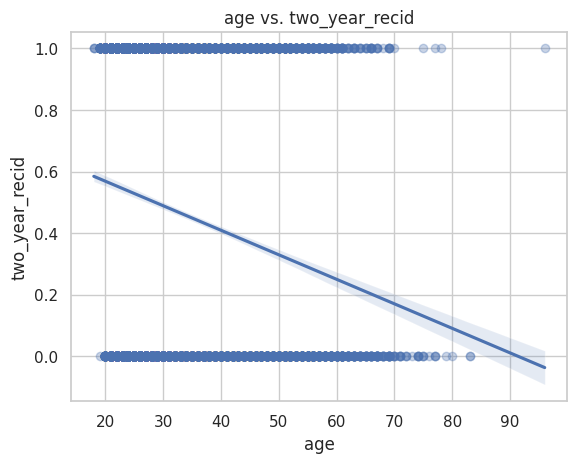


📊 Feature: juv_fel_count
count    7214.000000
mean        0.067230
std         0.473972
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: juv_fel_count, dtype: float64


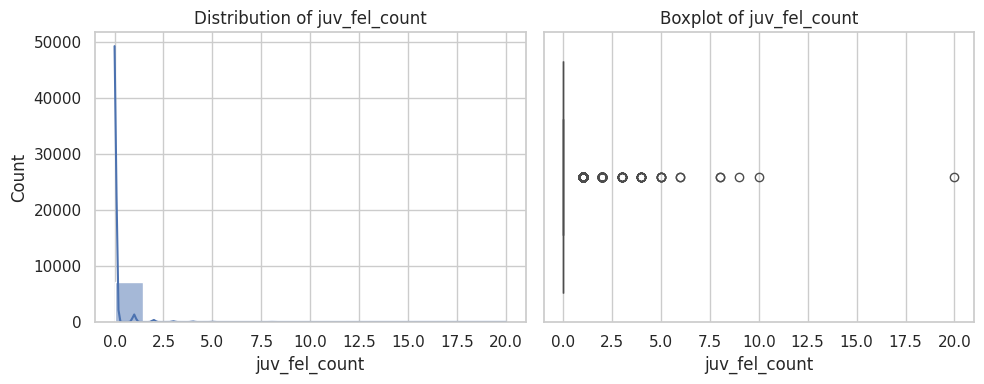

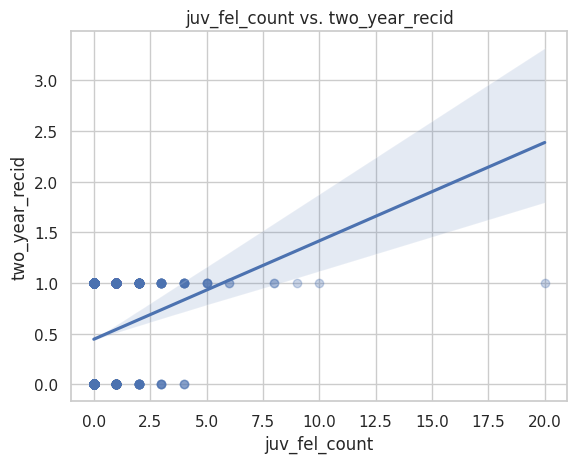


📊 Feature: decile_score
count    7214.000000
mean        4.509565
std         2.856396
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: decile_score, dtype: float64


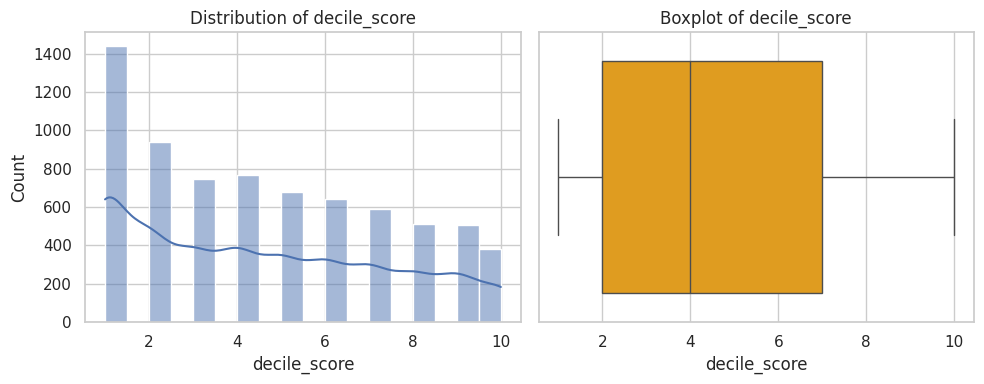

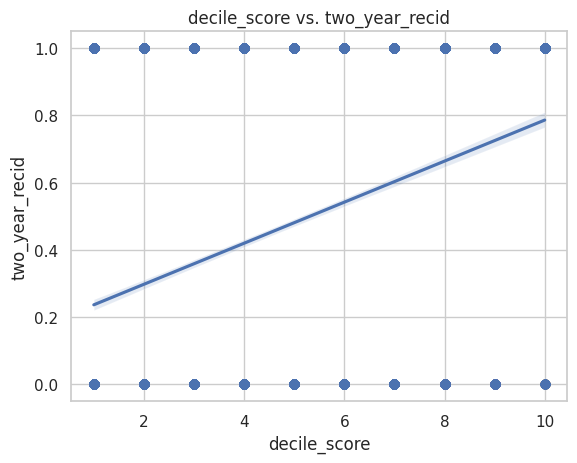


📊 Feature: juv_misd_count
count    7214.000000
mean        0.090934
std         0.485239
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: juv_misd_count, dtype: float64


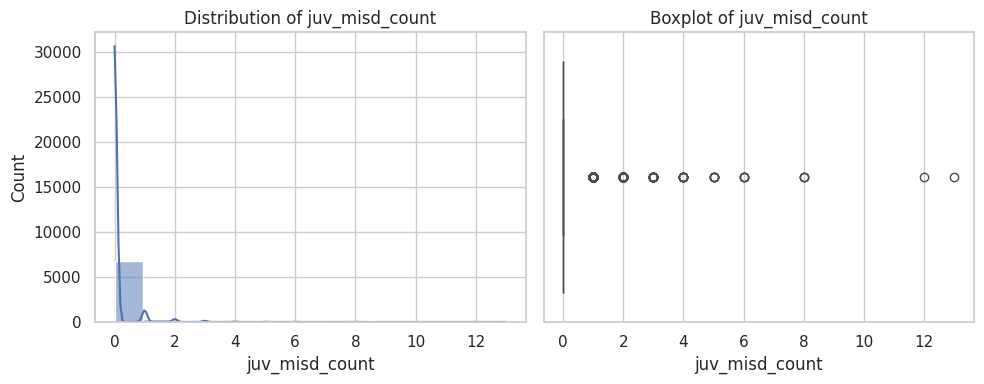

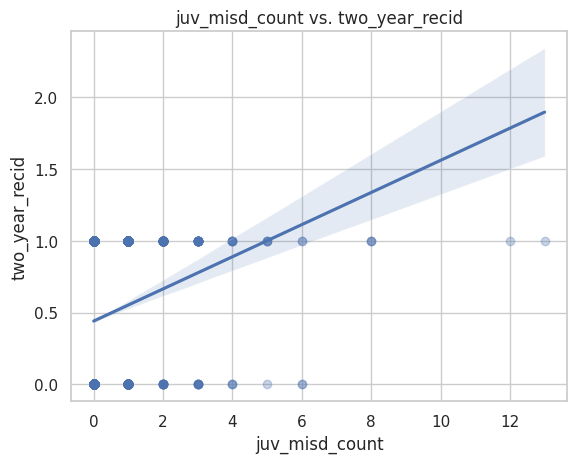


📊 Feature: juv_other_count
count    7214.000000
mean        0.109371
std         0.501586
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.000000
Name: juv_other_count, dtype: float64


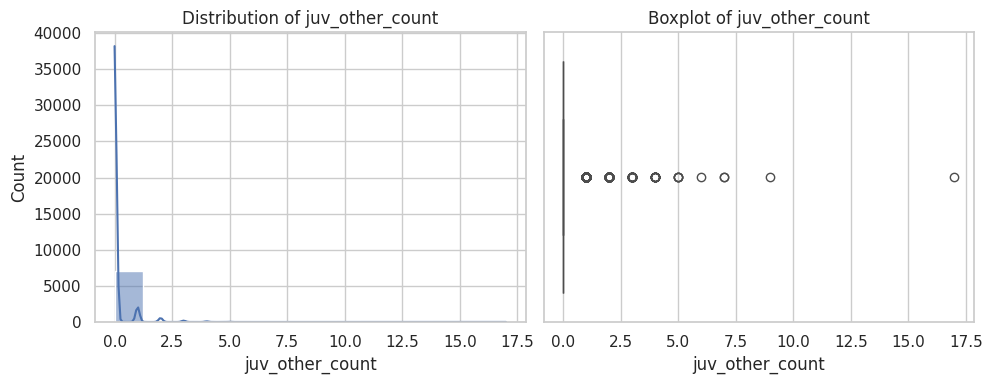

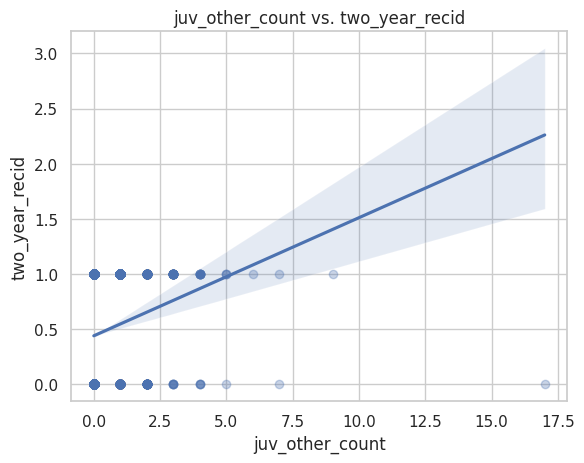


📊 Feature: priors_count
count    7214.000000
mean        3.472415
std         4.882538
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        38.000000
Name: priors_count, dtype: float64


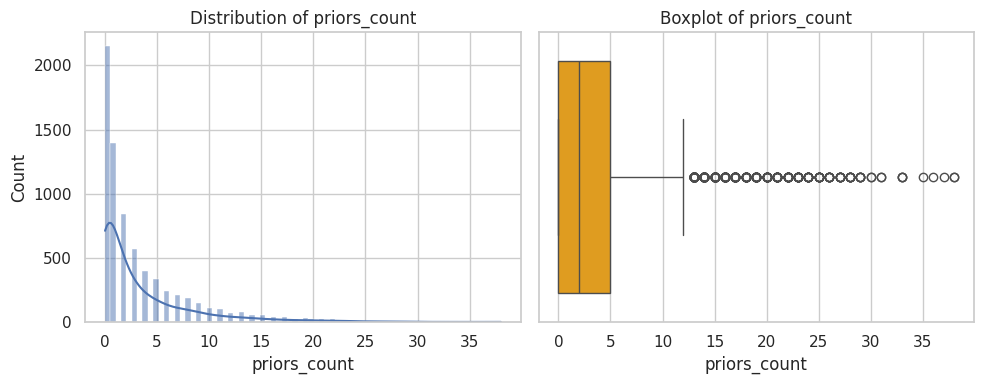

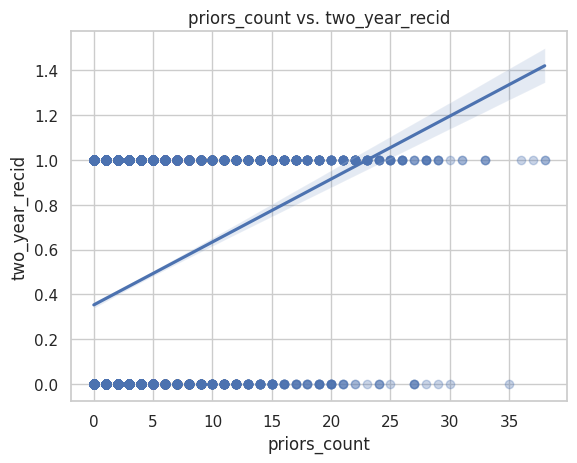


📊 Feature: days_b_screening_arrest
count    7214.000000
mean        3.304763
std        74.178659
min      -414.000000
25%        -1.000000
50%        -1.000000
75%         0.000000
max      1057.000000
Name: days_b_screening_arrest, dtype: float64


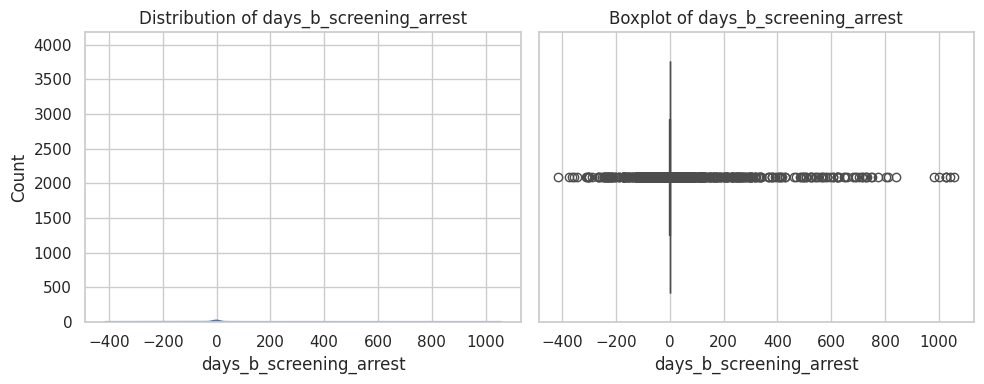

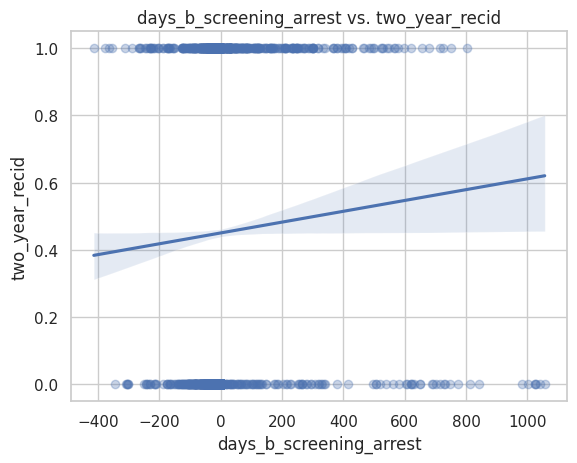


📊 Feature: c_days_from_compas
count    7214.000000
mean       57.731368
std       329.236969
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      9485.000000
Name: c_days_from_compas, dtype: float64


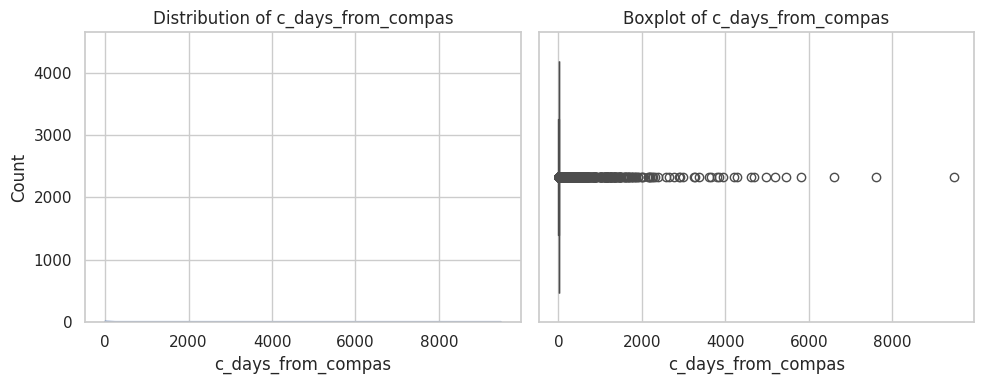

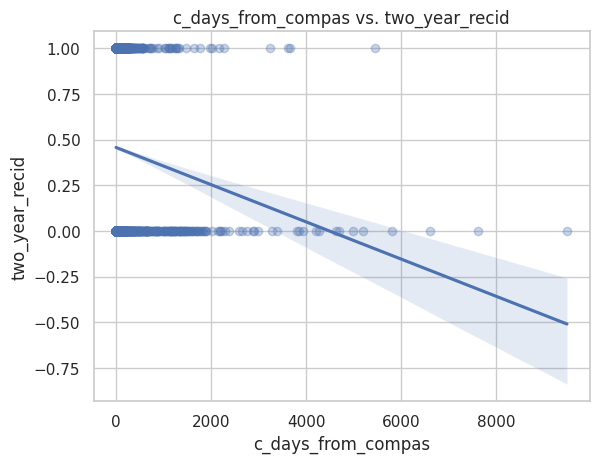


📊 Feature: is_recid
count    7214.000000
mean        0.481148
std         0.499679
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_recid, dtype: float64


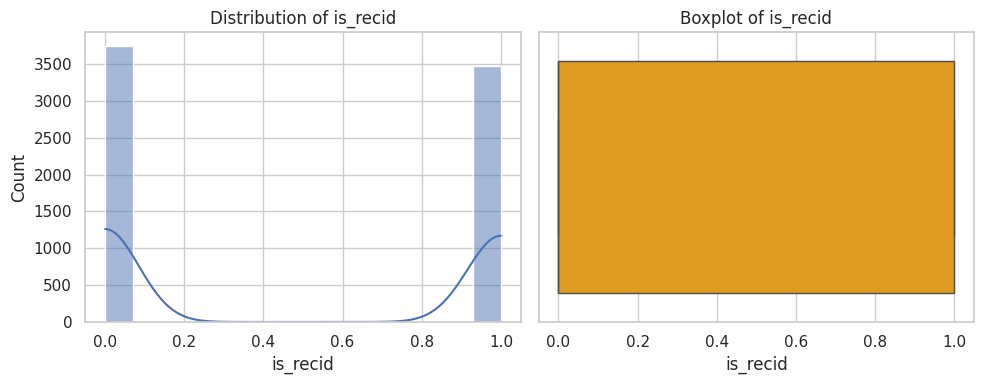

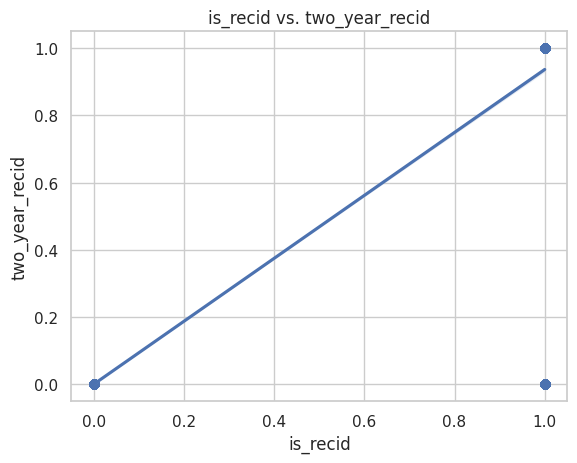

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# --- Load Dataset ---
try:
    df = pd.read_csv('/content/drive/MyDrive/machine learning/week 4/compas-scores-two-years.csv')
    print(f" Data loaded. Shape: {df.shape}")
except FileNotFoundError:
    print(" File not found. Loading example data.")
    df = pd.DataFrame({'col1': [1, 2, 3, 4, 5], 'col2': [6, 7, 8, 9, 10], 'target': [0, 1, 0, 1, 0]})

# --- Set target variable ---
target = 'two_year_recid' if 'two_year_recid' in df.columns else df.columns[-1]

# --- Feature Engineering ---
# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

# One-hot encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --- EDA & Visualization Function ---
def visualize_feature(col):
    print(f"\n📊 Feature: {col}")
    if pd.api.types.is_numeric_dtype(df[col]):
        print(df[col].describe())

        # Histogram & Boxplot
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        sns.histplot(df[col], kde=True, ax=axs[0])
        axs[0].set_title(f'Distribution of {col}')
        sns.boxplot(x=df[col], ax=axs[1], color='orange')
        axs[1].set_title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

        # Correlation with target
        if pd.api.types.is_numeric_dtype(df[target]):
            sns.regplot(x=col, y=target, data=df, scatter_kws={'alpha':0.3})
            plt.title(f'{col} vs. {target}')
            plt.show()

    else:
        # Categorical plot
        try:
            plt.figure(figsize=(8, 4))
            sns.countplot(x=col, data=df, hue=target)
            plt.title(f'Countplot of {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print(df[col].value_counts())
        except:
            print(f"Too many categories in {col} to plot.")

# --- Run Visualization for All Features (except target) ---
for col in df.columns:
    if col != target:
        visualize_feature(col)

# --- Summary Info ---
print("\n📄 Dataset Info:")
print(df.info())
print("\n🔍 Correlation Matrix:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
